In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

!\cp "drive/My Drive/WaveGen3/config.py" .
!\cp "drive/My Drive/WaveGen3/model.py" .
!\cp "drive/My Drive/WaveGen3/data.py" .
!\cp "drive/My Drive/WaveGen3/train.py" .
!\cp "drive/My Drive/WaveGen3/interact.py" .
!\cp "drive/My Drive/WaveGen3/ext.py" .

!pip uninstall -y torch                                                       &> /dev/null
# !pip install -q torch==1.5.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install "drive/My Drive/torch-1.5.0+cu101-cp37-cp37m-linux_x86_64.whl"   &> /dev/null
# !pip show torch
!pip install librosa --upgrade                                                &> /dev/null
# !pip uninstall -y librosa                                                   &> /dev/null
# !pip install librosa                                                        &> /dev/null
# !pip show librosa

Mounted at /content/drive


In [2]:
import config
config.model_path      = 'drive/My Drive/WaveGen3/models/model'
config.data_path       = 'drive/My Drive/WaveGen3/data'

config.dev_ratio       = 0
config.batch_size      = 0
config.max_seq_len     = 0

config.state_size      = 512
config.hidden_sizes    = []
config.hidden_acts     = 't'
config.init_xavier     = True

config.hm_epochs       = 100
config.learning_rate   = 1e-3
config.loss_squared    = True
config.optimizer       = 'custom'
config.gradient_clip   = 0

config.fresh_model     = True
config.fresh_meta      = True
config.ckp_per_ep      = config.hm_epochs//10

config.use_gpu         = True

In [3]:
# from data import main; main();
#from train import main; main();      

state size: 128
	 hidden size: None
		 learning rate: 0.005
		 started @ 17:21:14


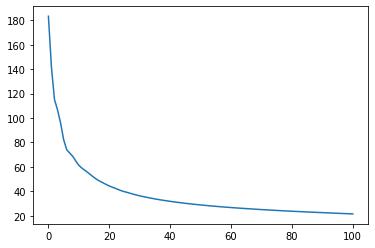

		 initial loss:183.28897705078126, final loss:21.571710205078126
state size: 256
	 hidden size: None
		 learning rate: 0.005
		 started @ 17:39:18


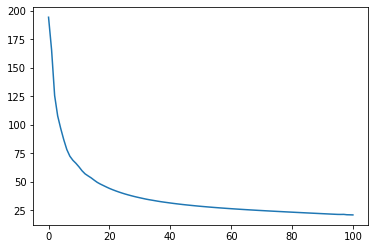

		 initial loss:194.1310791015625, final loss:21.056655883789062
state size: 512
	 hidden size: None
		 learning rate: 0.005
		 started @ 17:57:17


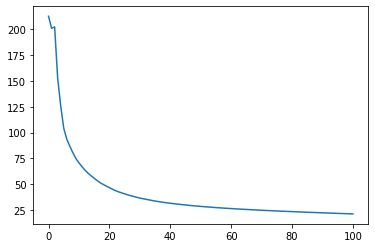

		 initial loss:212.46904296875, final loss:21.543916320800783


In [4]:
from train import main
from ext import now

config.hm_epochs = 100
config.ckp_per_ep = 25

for state_size in [128,256,512]:
  print(f'state size: {state_size}')
  config.state_size = state_size

  for hidden_size in [None]:#,128,256,512,1024]:
    print(f'\t hidden size: {hidden_size}')
    if hidden_size: config.hidden_sizes = [hidden_size]

    for learning_rate in [5e-3,2e-3,1e-3,5e-4,2e-4,1e-4,5e-5,2e-5,1e-5]:
      print(f'\t\t learning rate: {learning_rate}')
      config.learning_rate = learning_rate

      config.model_path = f'drive/My Drive/WaveGen3/models/model{state_size},{hidden_size},{learning_rate}'

      print(f'\t\t started @ {now()}')
      main(disp_text=False)
      print(f'\t\t initial loss:{config.all_losses[0]}, final loss:{config.all_losses[-1]}')

      if config.all_losses[0] > config.all_losses[-1]: 
        break

In [7]:
import os, glob
config.model_path     = sorted(glob.glob('drive/My Drive/WaveGen3/models/*.pk'),key=os.path.getmtime)[-1][:-3]
# config.model_path   = f'drive/My Drive/WaveGen3/models/model_ckp{config.hm_epochs-1}'
config.output_file    = 'resp' # 'drive/My Drive/WaveGen3/resp'
config.hm_output_file = 3
config.hm_extra_steps = 100

from interact import main; main();

In [ ]:
from data import load_data
from model import load_model, respond_to

d = load_data()
m = load_model()
respond_to(m,d)

for m in m:
  for l in m:
    for k,v in l._asdict().items():
      print(f'{k}, {v.requires_grad}, {(v.grad/len(d)).pow(2).sum()/(v.size(0)*v.size(1))}')